In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Binomial Distribution

In [0]:
# EVENT
# OUTCOME

# Number of times that event is conducted

# you can estimate the probability of happening of that event

In [0]:
import scipy.stats as stats

In [0]:
bin_exp = stats.binom.rvs(n=10, # number of times tossing a coin
               p=0.5, # prob of getting a head
               size=100) # total experiemnts

In [0]:
pd.crosstab(index='counts',columns=bin_exp)

col_0,1,2,3,4,5,6,7,8
row_0,,,,,,,,
counts,1,4,14,23,29,16,9,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x19159a9898>]], dtype=object)

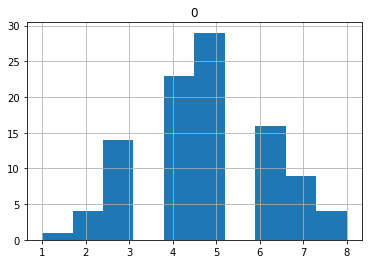

In [0]:
pd.DataFrame(bin_exp).hist()

In [0]:
stats.binom.cdf(k=5,
               n=10,
               p=0.5)

0.62304687499999989

In [0]:
# binomial outcome then use pmf

In [0]:
stats.binom.pmf(k=5,
               n=10,
               p=0.5)

0.24609375000000025

# The Geometric and Exponential Distribution

In [0]:
stats.geom.rvs(size=100,
              p=0.5)

array([1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 1, 2, 2, 3, 2, 2, 3, 1, 1, 4, 2, 3, 2,
       1, 1, 1, 3, 5, 1, 2, 4, 2, 1, 3, 2, 2, 1, 1, 1, 3, 1, 1, 1, 4, 6, 1,
       1, 1, 1, 3, 1, 1, 4, 3, 1, 4, 6, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 3,
       2, 3, 1, 1, 2, 2, 2, 2, 1, 9, 1, 5, 1, 1, 2, 1, 5, 1, 4, 1, 3, 1, 1,
       4, 1, 1, 3, 2, 2, 2, 1])

# The Poisson Distribution

In [0]:
# count data

In [0]:
stats.poisson.rvs(size=100,
                 mu=12)

array([14, 10, 12, 12, 15, 17, 11, 12, 15, 15, 18, 16, 11,  8,  7, 10, 11,
       13, 13,  9,  8,  9, 14,  9, 13,  6, 15,  8,  8, 12, 13, 11, 12, 14,
        7, 19, 13,  9,  8, 10, 11, 17, 10, 13, 11,  7, 12, 15, 13,  9,  7,
        5, 12,  8, 10, 10,  6,  8,  6, 13, 15, 14, 17, 10, 13, 15, 13, 16,
       15, 17, 15, 18, 17,  6, 14, 16, 14,  6, 17, 13, 10,  9,  8,  9, 12,
       18,  9,  7, 12, 12, 13,  9, 10, 13, 14,  9,  7, 12, 14,  5])

# Statistical Inference and Estimation

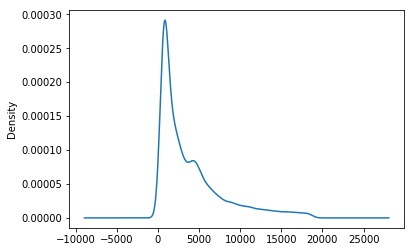

In [0]:
df.price.plot(kind='density')

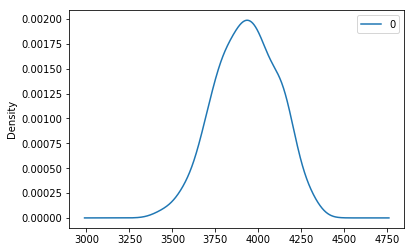

In [0]:
point_estimates = [] 

for x in range(200):
    sample = np.random.choice(a=df.price,size=500)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind='density')

In [0]:
np.mean(point_estimates) #sample mean

3930.4598499999997

In [0]:
np.mean(df.price) #population mean

3932.799721913237

In [0]:
np.mean(df.price) - np.mean(point_estimates) 

2.3398719132374026

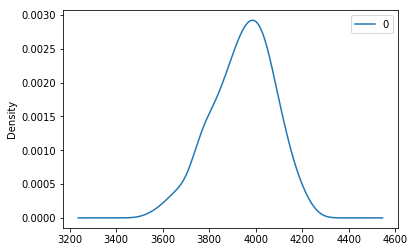

In [0]:
point_estimates = [] 

for x in range(200):
    sample = np.random.choice(a=df.price,size=750)
    point_estimates.append(sample.mean())
    
pd.DataFrame(point_estimates).plot(kind='density')

In [0]:
np.mean(point_estimates)

3944.06342

In [0]:
np.mean(df.price)

3932.799721913237

In [0]:
# What is average pay for all the H1B holders?

In [0]:
# n=? 200,000 # pop mean
# sampled=?

# 100, mean=? sample 1 mean
# 200, mean=? sample 2 mean

# 500, mean=? sample 3 mean

# Interval estimate, it gives a range

In [0]:
sample_size = 1000
sample = np.random.choice(a=df.price,size=sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q=0.975)

print('Z critical value')
print(z_critical)

pop_std = df.price.std()

margin_of_error = z_critical * (pop_std/np.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)

print('Confidence Interval')
print(confidence_interval)

Z critical value
1.95996398454
Confidence Interval
(3668.6255068618511, 4163.1524931381491)


In [0]:
sample_size = 1000

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a=df.price,size=sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q=0.975)

    pop_std = df.price.std()
    
    stats.norm.ppf(q=0.025)

    margin_of_error = z_critical * (pop_std/np.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                          sample_mean + margin_of_error)
    intervals.append(confidence_interval)

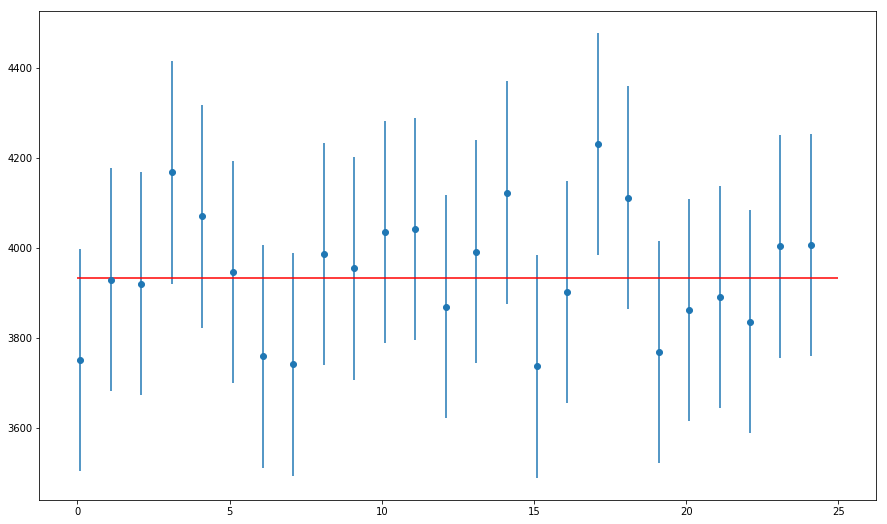

In [0]:
plt.figure(figsize=(15,9))

plt.errorbar(x=np.arange(0.1,25,1),
            y=sample_means,
            yerr=[(top-bot)/2 for top, bot in intervals],
            fmt='o')

plt.hlines(xmin=0,xmax=25,
          y = np.mean(df.price),color='red')

In [0]:
sample_size = 500

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a=df.price,size=sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q=0.975)

    pop_std = df.price.std()
    
    stats.norm.ppf(q=0.025)

    margin_of_error = z_critical * (pop_std/np.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                          sample_mean + margin_of_error)
    intervals.append(confidence_interval)

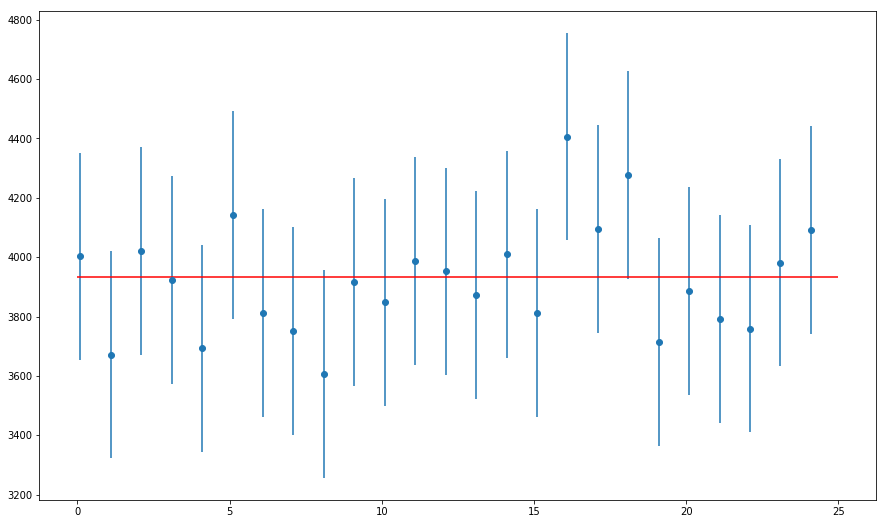

In [0]:
plt.figure(figsize=(15,9))

plt.errorbar(x=np.arange(0.1,25,1),
            y=sample_means,
            yerr=[(top-bot)/2 for top, bot in intervals],
            fmt='o')

plt.hlines(xmin=0,xmax=25,
          y = np.mean(df.price),color='red')

In [0]:
# you want to predict whether the true population mean falls in the confidence interval that you have defined

In [0]:
# statistical hypothesis test is required in order to achive this

In [0]:
# T-test for single sample test of mean without information about population standard deviation

In [0]:
sample_size = 25
sample = np.random.choice(a=df.price,size=sample_size)
sample_mean = sample.mean()

t_critical = stats.t.ppf(q=0.975,df=sample_size-1)

print('t critical value')
print(t_critical)

sample_std = sample.std()

sigma = sample_std/np.sqrt(sample_size)

margin_of_error = t_critical * sigma

confidence_interval = (sample_mean - margin_of_error,
                      sample_mean + margin_of_error)

print('Confidence Interval')
print(confidence_interval)

t critical value
2.06389856163
Confidence Interval
(2363.1616808635927, 5719.7183191364074)


# Hypothesis Test Process

In [0]:
# Decide the Null Hypothesis
# Alternate Hypothesis
# identify the statistics
# decide the signficance level
# make conclusions

In [0]:
# One sample test of mean, t-test for single sample

In [0]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [0]:
# average price of 'ideal' cut is 3200, true /false, you have to use a statistical test

In [0]:
# Null: the true mean price of ideal cut diamonds = 3200
# Alt: the true mean is different from 3200

In [0]:
# 5% level of significance, (alpha value)

In [0]:
df[df.cut=='Ideal']['price'].mean()

3457.541970210199

In [0]:
print(stats.ttest_1samp(a=df[df.cut=='Ideal']['price'],
                 popmean=3200))
np.round(stats.ttest_1samp(a=df[df.cut=='Ideal']['price'],
                 popmean=3200),3)

Ttest_1sampResult(statistic=9.9274803708338339, pvalue=3.5453377059132918e-23)


array([ 9.927,  0.   ])

In [0]:
#by looking at the p-value: since the p-value is less than alpha value, reject the null hypothesis 

In [0]:
# true mean of ideal cut diamonds != 3200, 
df[df.cut=='Ideal']['price'].mean()

3457.541970210199

In [0]:
df[df.cut=='Ideal']['price'].shape[0]

21551

In [0]:
stats.t.interval(alpha=0.95,
                df=df[df.cut=='Ideal']['price'].shape[0]-1,
                loc=df[df.cut=='Ideal']['price'].mean(),
                scale=df[df.cut=='Ideal']['price'].std())

(-4007.2064265689733, 10922.290366989371)

In [0]:
# Two sample test of mean

In [0]:
# Task:
# Make an inference whether the average price of diamonds for premium quality is significantly different 
# from good quality?

In [0]:
# Hint: two samples t-test

In [0]:
# dependent samples t-test
# independent samples t-test

In [0]:
stats.ttest_ind(a=df[df.cut=='Premium']['price'],
                b=df[df.cut=='Good']['price'],
               equal_var=False)

Ttest_indResult(statistic=10.192914587265602, pvalue=2.7951686873072847e-24)

In [0]:
# Null: average price of premium = good
# alt: average price of premium != good

In [0]:
# conclusion: since the p-value is less than 0.05, reject the null hypothesis

In [0]:
np.round(stats.ttest_ind(a=df[df.cut=='Premium']['price'],
                b=df[df.cut=='Good']['price'],
               equal_var=False),2)

array([ 10.19,   0.  ])

In [0]:
# you wanted to join a weight reduction/gymming program
# how effective is the program?, if there is a significant change in weight of people who joined this program
# compare the before and after weights

In [0]:
weight_before = [23,34,43,23,35,45,54,56,76,43]
weight_after = [21,32,42,25,37,42,55,55,67,43]

In [0]:
stats.ttest_rel(weight_before,weight_after)

Ttest_relResult(statistic=1.2850936923219269, pvalue=0.23084409645634368)

In [0]:
# conclusion: since the p-value is greater than 0.05, at 95% confidence level you will fail to reject the null 
# hypothesis, accepting the null hypothesis, that the avwrage wight is same before and after the program
# the weight reduction program is not at all effective

In [0]:
# Task:
# Whether the average diamond prices are different for before clean up and after clean up

In [0]:
set(df.color)

{'D', 'E', 'F', 'G', 'H', 'I', 'J'}

In [0]:
# how to make a conclusion about the relationship between two categorical columns?

In [0]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [0]:
# Is there any association between diamond cut and diamond clarity?

# Is there any relationship between diamond color and cut?

In [0]:
# chi-square test of independence, it tests two categorical columns

In [0]:
# Is there any association between diamond cut and diamond clarity?
pd.crosstab(df.cut,df.clarity)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,210,9,408,466,170,261,17,69
Good,96,71,1560,1081,648,978,186,286
Ideal,146,1212,4282,2598,3589,5071,2047,2606
Premium,205,230,3575,2949,1989,3357,616,870
Very Good,84,268,3240,2100,1775,2591,789,1235


In [0]:
cut_table = df.cut.value_counts()
cut_table

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [0]:
clarity_table = df.clarity.value_counts()
clarity_table

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [0]:
ct = pd.crosstab(df.cut,df.clarity,margins=False)
ct

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,210,9,408,466,170,261,17,69
Good,96,71,1560,1081,648,978,186,286
Ideal,146,1212,4282,2598,3589,5071,2047,2606
Premium,205,230,3575,2949,1989,3357,616,870
Very Good,84,268,3240,2100,1775,2591,789,1235


In [0]:
stats.chi2_contingency(ct)

(4391.3980672003636,
 0.0,
 28,
 array([[   22.11735261,    53.42788283,   389.96384872,   274.4223211 ,
           243.88783834,   365.87652948,   109.09436411,   151.20986281],
        [   67.39610679,   162.80571005,  1188.29977753,   836.22106044,
           743.17623285,  1114.90077864,   332.43288839,   460.76744531],
        [  296.05656285,   715.17037449,  5219.94466073,  3673.33878383,
          3264.61292176,  4897.51868743,  1460.30598813,  2024.05202076],
        [  189.45367075,   457.65461624,  3340.36735261,  2350.65728587,
          2089.1038376 ,  3134.03926585,   934.48470523,  1295.23926585],
        [  165.97630701,   400.94141639,  2926.4243604 ,  2059.36054876,
          1830.21916945,  2745.6647386 ,   818.68205413,  1134.73140527]]))

# Analysis of variance (ANOVA)

In [0]:
# if we want to compare the means of more than 2 groups, independent, 

In [0]:
# which specific cut category is sold with highest average price

In [0]:
stats.f_oneway(df[df.cut=='Premium']['price'],
               df[df.cut=='Fair']['price'],
              df[df.cut=='Good']['price'],
              df[df.cut=='Ideal']['price'],
              df[df.cut=='Very Good']['price'])

F_onewayResult(statistic=175.68871735080606, pvalue=8.4283073075945195e-150)

In [0]:
np.round(stats.f_oneway(df[df.cut=='Premium']['price'],
               df[df.cut=='Fair']['price'],
              df[df.cut=='Good']['price'],
              df[df.cut=='Ideal']['price'],
              df[df.cut=='Very Good']['price']),2)

array([ 175.69,    0.  ])

In [0]:
# Null: average of all categories are same
# Alt: average of all the groups by cut is different

In [0]:
#conclusion: since the p-value is less than 0.05, you will reject the null hypothessis

In [0]:
# Tukey's HSD - Honest Significance Difference Testing

In [0]:
results = stats.f_oneway(df[df.cut=='Premium']['price'],
               df[df.cut=='Fair']['price'],
              df[df.cut=='Good']['price'],
              df[df.cut=='Ideal']['price'],
              df[df.cut=='Very Good']['price'])

In [0]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [0]:
output = pairwise_tukeyhsd(df.price,df.cut)

In [0]:
output.meandiffs

array([ -429.89331228,  -901.21579376,   225.49994032,  -376.99787323,
        -471.32248148,   655.39325261,    52.89543905,  1126.71573409,
         524.21792054,  -602.49781355])

TypeError: 'Figure' object does not support indexing

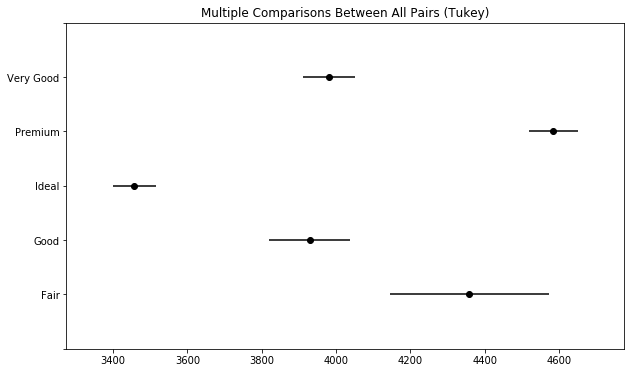

In [0]:
output.plot_simultaneous()[0]

In [0]:
output.summary()

group1,group2,meandiff,lower,upper,reject
Fair,Good,-429.8933,-740.4567,-119.3299,True
Fair,Ideal,-901.2158,-1180.5785,-621.8531,True
Fair,Premium,225.4999,-59.2739,510.2738,False
Fair,Very Good,-376.9979,-663.8694,-90.1263,True
Good,Ideal,-471.3225,-642.367,-300.2779,True
Good,Premium,655.3933,475.6466,835.1399,True
Good,Very Good,52.8954,-130.1565,235.9474,False
Ideal,Premium,1126.7157,1008.8058,1244.6257,True
Ideal,Very Good,524.2179,401.3281,647.1078,True
Premium,Very Good,-602.4978,-737.2366,-467.7591,True
